In [ ]:
import anvil.server

In [ ]:
anvil.server.connect("server_3UM3GT63IDHS7M72G3HB4J5K-MPO27PEIXDYN6RRF")

In [ ]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import r2_score

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MachineLearning/dataset.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df_exclude_numeric = df.select_dtypes(exclude=np.number).columns

In [ ]:
df[df_exclude_numeric].head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [ ]:
df_exclude_numeric

Index(['sex', 'smoker', 'region'], dtype='object')

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
for i in df_exclude_numeric:
  df[i] = label_encoder.fit_transform(df[i])
print("Encoded data")
df.head()

Encoded data


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


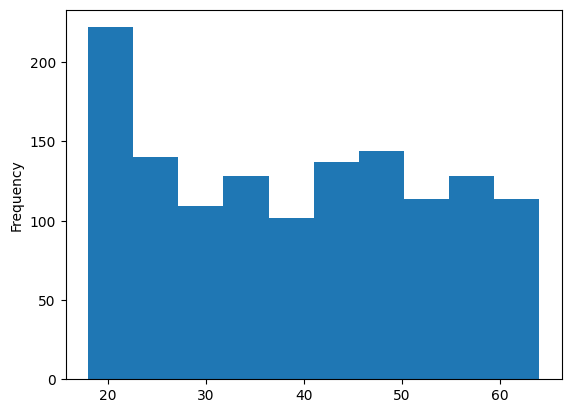

In [ ]:
df['age'].plot(kind = 'hist')
plt.show()

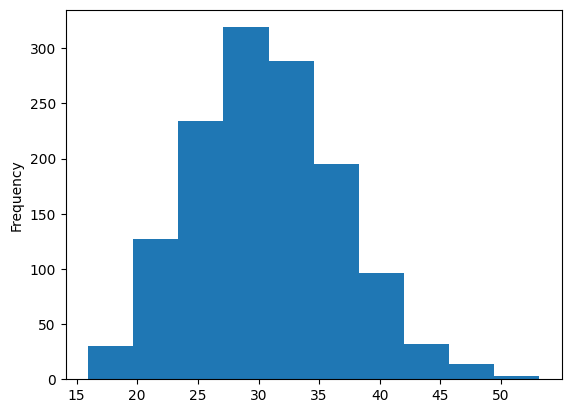

In [ ]:
df['bmi'].plot(kind = 'hist')
plt.show()

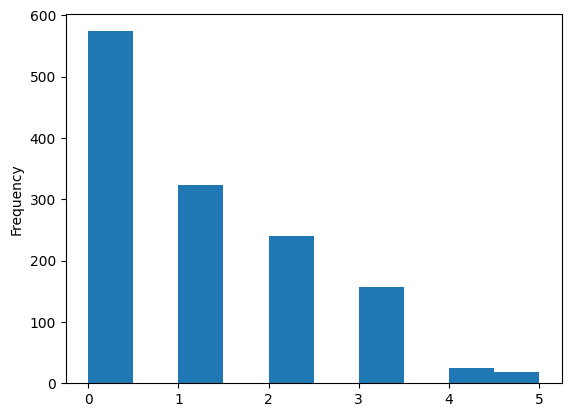

In [ ]:
df['children'].plot(kind = 'hist')
plt.show()

In [ ]:
corr_matrix = df.corr()
corr_matrix

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


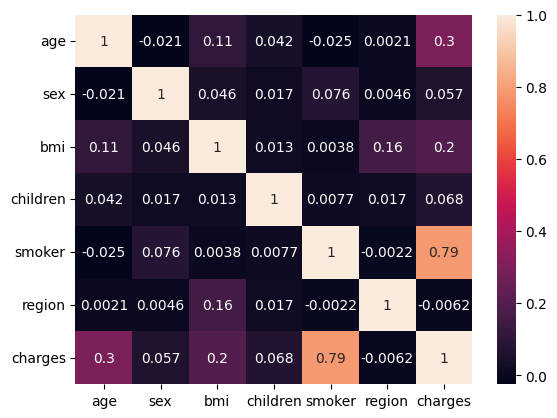

In [ ]:
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
df_new = df.drop(columns=["sex"], axis=1)
df_new

,age,bmi,children,smoker,region,charges
0,19,27.900,0,1,3,16884.92400
1,18,33.770,1,0,2,1725.55230
2,28,33.000,3,0,2,4449.46200
3,33,22.705,0,0,1,21984.47061
4,32,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...
1333,50,30.970,3,0,1,10600.54830
1334,18,31.920,0,0,0,2205.98080
1335,18,36.850,0,0,2,1629.83350
1336,21,25.800,0,0,3,2007.94500


In [ ]:
x = df_new.iloc[:,0:5]
x

,age,bmi,children,smoker,region
0,19,27.900,0,1,3
1,18,33.770,1,0,2
2,28,33.000,3,0,2
3,33,22.705,0,0,1
4,32,28.880,0,0,1
...,...,...,...,...,...
1333,50,30.970,3,0,1
1334,18,31.920,0,0,0
1335,18,36.850,0,0,2
1336,21,25.800,0,0,3


In [ ]:
y = df_new['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [ ]:
X_train, X_valid, Y_train, Y_valid = train_test_split(x, y,test_size = 0.2, random_state = 101)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [ ]:
pred_linear = regressor.predict(X_valid)

In [ ]:
math.sqrt(mean_squared_error(Y_valid, pred_linear))

5783.288956128114

In [ ]:
r2_score(Y_valid,pred_linear)

0.7629770092528655

In [ ]:
tree = DecisionTreeRegressor(random_state=0)
tree.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
pred_tree = tree.predict(X_valid)

In [ ]:
math.sqrt(mean_squared_error(Y_valid, pred_tree))

6223.335115714435

In [ ]:
r2_score(Y_valid,pred_tree)

0.7255349403571496

In [ ]:
random = RandomForestRegressor(random_state=0)
random.fit(X_train, Y_train)

RandomForestRegressor(random_state=0)

In [ ]:
pred_random = random.predict(X_valid)

In [ ]:
math.sqrt(mean_squared_error(Y_valid, pred_random))

4631.1093842451355

In [ ]:
r2_score(Y_valid,pred_random)

0.8480114864188771

In [ ]:
@anvil.server.callable
def charges(age, bmi, children, smoker, region):
  age = float(age)
  bmi = float(bmi)
  children = float(children)
  smoker = float(smoker)
  region = float(region)
  classification = random.predict([[age, bmi, children, smoker, region]])
  return classification[0]

Đánh giá:

Linear Regression:
*   R2 Score: 0.7629770092528655
*   RMSE: 5783.288956128114

Linear Regression có một R2 Score khá tốt, khoảng 0.76, cho thấy mô hình giải thích được một phần đáng kể của biến độc lập. RMSE là 5783, giá trị này thể hiện sự chênh lệch giữa giá trị dự đoán và giá trị thực tế.

Decision Tree Regressor:
*   R2 Score: 0.7255349403571496
*   RMSE: 6223.335115714435

Decision Tree Regressor có một R2 Score đáng chú ý, khoảng 0.73. Tuy nhiên, RMSE khá cao (6223), có thể cho thấy mô hình có thể không dự đoán tốt đối với một số điểm dữ liệu.

Random Forest Regressor:
*   R2 Score: 0.8480114864188771
*   RMSE: 4631.1093842451355

Random Forest Regressor có R2 Score cao nhất trong ba mô hình, khoảng 0.85, và RMSE thấp nhất (4631). Điều này cho thấy mô hình Random Forest có khả năng dự đoán tốt hơn so với Linear Regression và Decision Tree Regressor trong bối cảnh cụ thể của dữ liệu này.

Tổng quan, Random Forest Regressor có vẻ là một lựa chọn tốt hơn giữa ba mô hình này do có R2 Score cao và RMSE thấp.